In [66]:
from astropy.table import Table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [67]:
table = Table.read("ch2_xsm_20210403_v1_level2.lc")


In [68]:
print(table)

       TIME           RATE     ERROR   FRACEXP
        s            ct / s   counts/s        
------------------ --------- --------- -------
134179200.15828899  32.71377 5.7195954     1.0
134179201.15828899 28.185081 5.3089623     1.0
134179202.15828899 37.736465 6.1430016     1.0
134179203.15828899 23.943155  4.893174     1.0
134179204.15828899 26.802471   5.17711     1.0
134179205.15828899 25.007275  5.000727     1.0
134179206.15828899 30.578094 5.5297465     1.0
134179207.15828899  36.14796  6.012317     1.0
134179208.15828899  32.20408  5.674864     1.0
134179209.15828899  54.24513 7.3651295     1.0
               ...       ...       ...     ...
  134265590.158289 33.801365 5.8138943     1.0
  134265591.158289  37.35678 6.1120195     1.0
  134265592.158289  51.93736  7.206758     1.0
  134265593.158289 50.552246   7.11001     1.0
  134265594.158289 49.431694 7.0307674     1.0
  134265595.158289 41.231915 6.4212084     1.0
  134265596.158289 47.148907  6.866506     1.0
  134265597.1

In [69]:
time = table["TIME"]
rate = table["RATE"]

In [70]:
print(time)
print(rate)

       TIME       
        s         
------------------
134179200.15828899
134179201.15828899
134179202.15828899
134179203.15828899
134179204.15828899
134179205.15828899
134179206.15828899
134179207.15828899
134179208.15828899
134179209.15828899
               ...
  134265590.158289
  134265591.158289
  134265592.158289
  134265593.158289
  134265594.158289
  134265595.158289
  134265596.158289
  134265597.158289
  134265598.158289
  134265599.158289
Length = 83637 rows
   RATE  
  ct / s 
---------
 32.71377
28.185081
37.736465
23.943155
26.802471
25.007275
30.578094
 36.14796
 32.20408
 54.24513
      ...
33.801365
 37.35678
 51.93736
50.552246
49.431694
41.231915
47.148907
 56.78958
 43.52312
49.322918
Length = 83637 rows


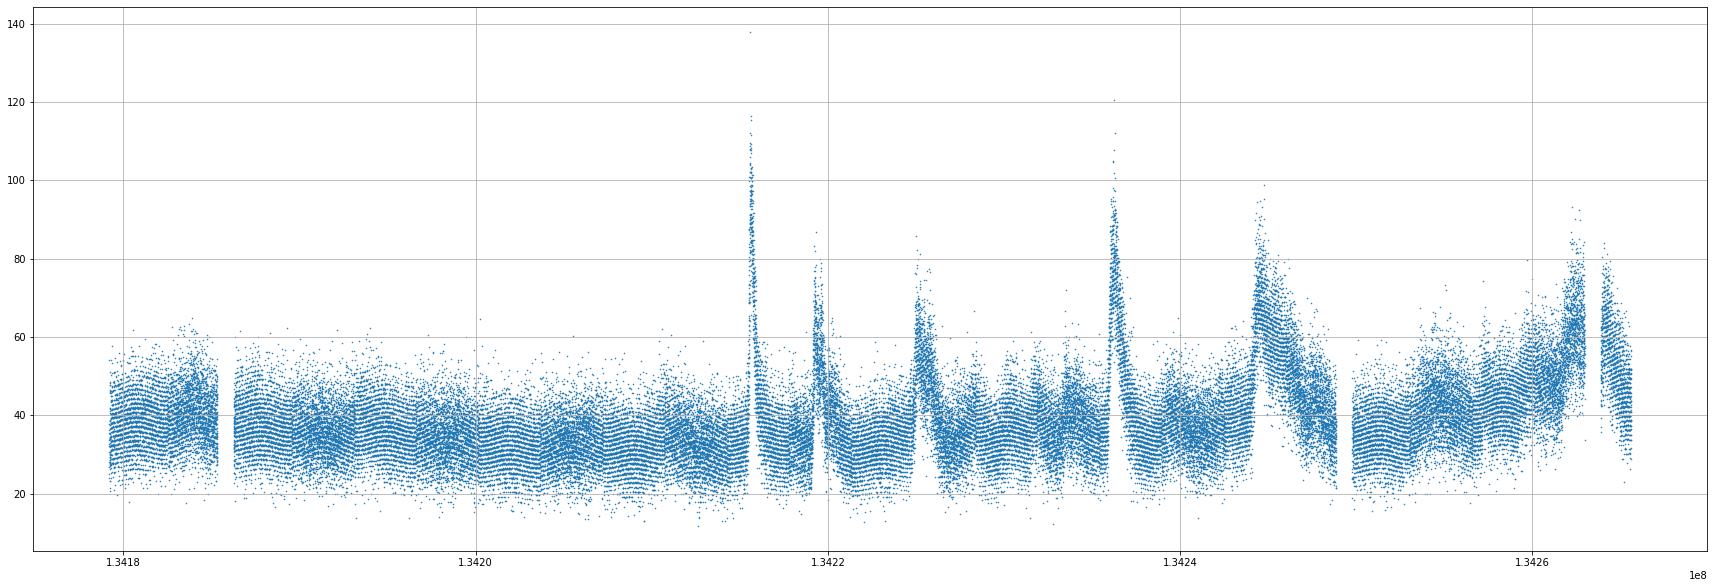

In [71]:
plt.figure(figsize=(30,10))
plt.scatter(time,rate,s=0.3)
plt.grid()
plt.show()

In [72]:
print(time)

       TIME       
        s         
------------------
134179200.15828899
134179201.15828899
134179202.15828899
134179203.15828899
134179204.15828899
134179205.15828899
134179206.15828899
134179207.15828899
134179208.15828899
134179209.15828899
               ...
  134265590.158289
  134265591.158289
  134265592.158289
  134265593.158289
  134265594.158289
  134265595.158289
  134265596.158289
  134265597.158289
  134265598.158289
  134265599.158289
Length = 83637 rows


In [73]:
time = [int(i - time[0])for i in time]


In [74]:
for i in range(len(time)-1):
    if(time[i+1]-time[i]>1):
        print(time[i+1]-time[i])

2
2
2
2
2
2
2
2
2
912
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
914
915


In [75]:
t1 = []
r1 = []
for i in range(len(time)-1):
    t1.append(time[i])
    r1.append(rate[i])
    if(time[i+1]-time[i]==2):
        t1.append(time[i]+1)
        r1.append((rate[i]+rate[i+1])/2)

        
    

In [76]:
for i in range(len(t1)-1):
    if(t1[i+1]-t1[i]>1):
        print(t1[i+1]-t1[i])

912
914
915


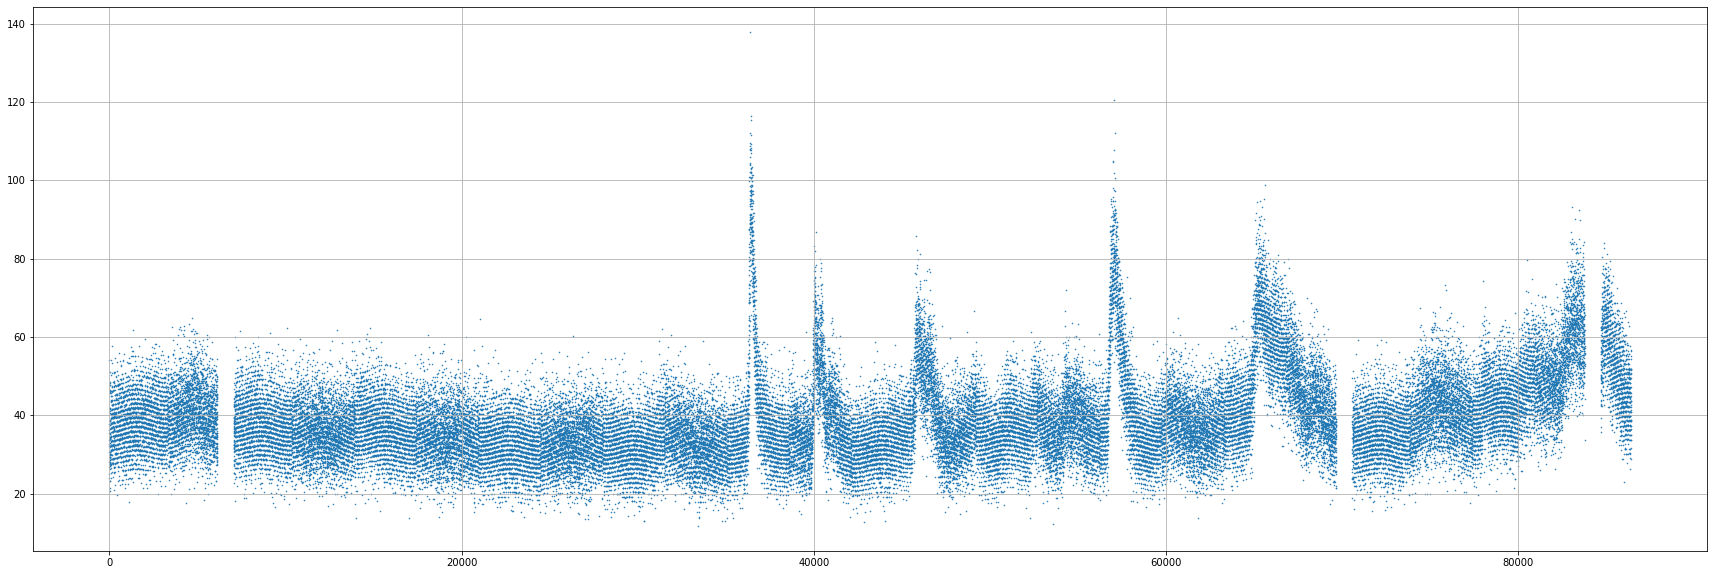

In [77]:
plt.figure(figsize=(30,10))
plt.scatter(t1,r1,s=0.3)
plt.grid()
plt.show()

In [78]:
s = []
e = []
s.append(0)
for i in range(1, len(t1)):
    if(t1[i]-t1[i-1]>1):
        e.append(i)
        s.append(i)
e.append(len(t1))
print(len(s),len(e))

4 4


In [79]:
t_dash=[]
r_dash=[]
for i in range(len(s)):
    x=[]
    y=[]
    for j in range(s[i],e[i]):
        x.append(t1[j])
        y.append(r1[j])
    t_dash.append(x)
    r_dash.append(y)
print(len(t_dash))
print(len(r_dash))

4
4


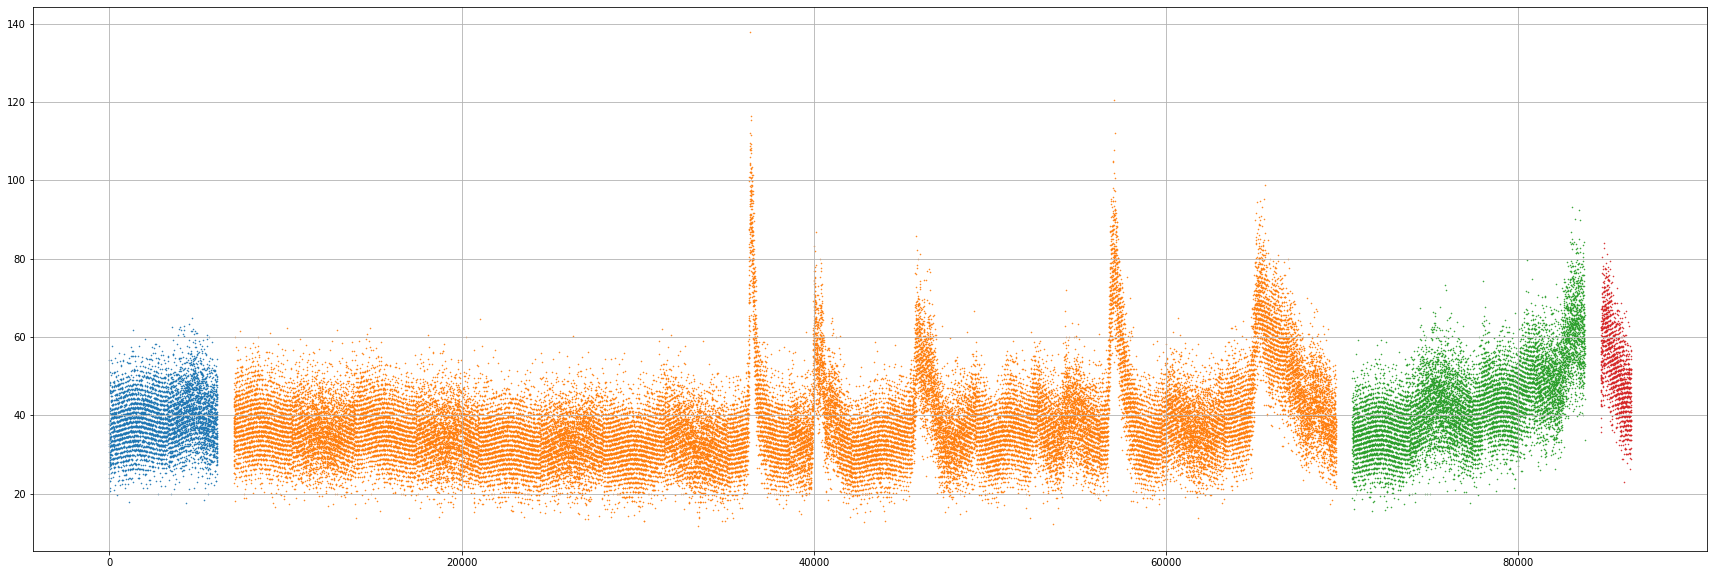

In [80]:
plt.figure(figsize=(30,10))
for i in range(len(t_dash)):
    plt.scatter(t_dash[i],r_dash[i],s=0.3)
plt.grid()
plt.show()

In [81]:
t3=[]
r3=[]
for i in range(len(t_dash)):
    x=t_dash[i]
    y=r_dash[i]
    if(len(x)>=240):
        w_size=240* int(1/1+np.exp(-1*(len(x)-240)))
        shift=w_size//2
        norm=[]
        norm_dp=[]
        norm_dp.append(np.mean(y[0:w_size]))
        norm.append(x[0])
        for j in range(w_size,len(y),shift):
            norm_dp.append(np.mean(y[j:j+shift]))
            norm.append(x[j])
        norm_dp=np.array(norm_dp)
        norm=np.array(norm)
        x_new=np.linspace(x[0],x[0]+len(x),x[0]+len(x))
        func=interp1d(norm,norm_dp,fill_value='extrapolate',kind='linear')
        y_new=func(x_new)
        t3.append(x_new)
        r3.append(y_new)
        


    

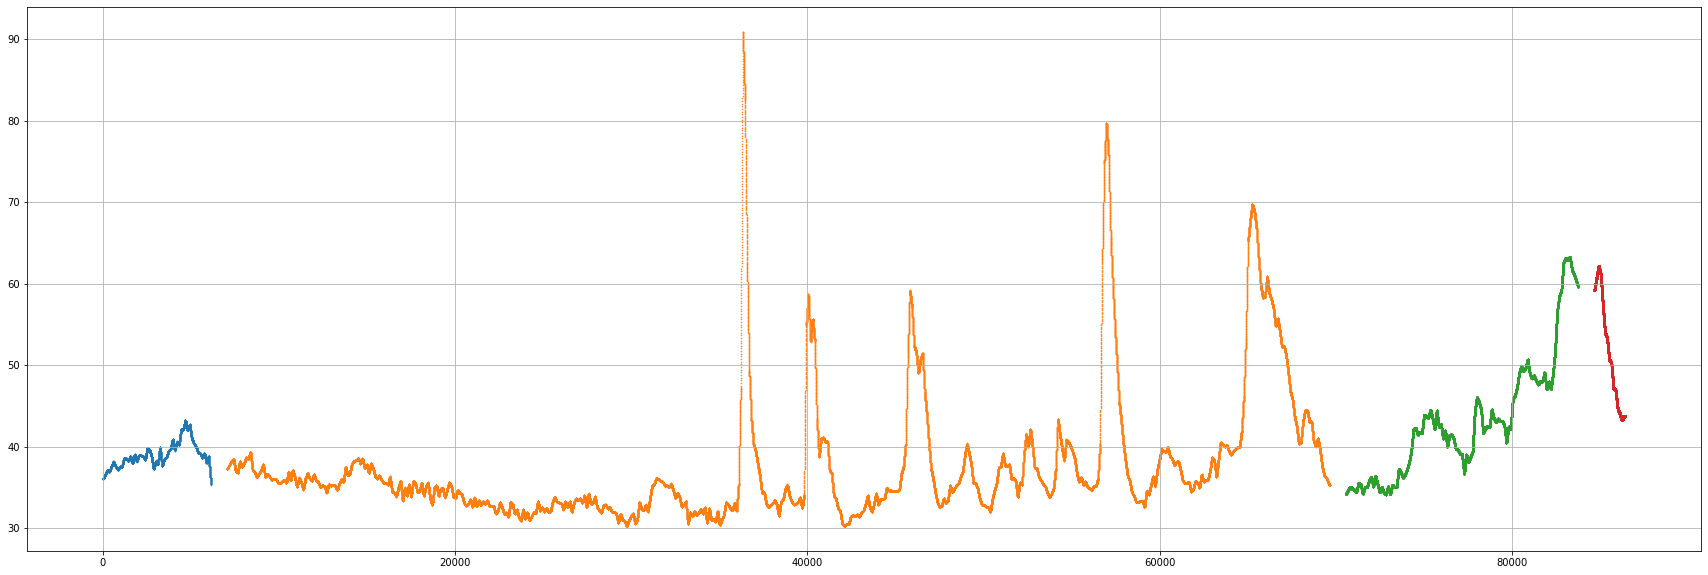

In [82]:
plt.figure(figsize=(30,10))
for i in range(len(r3)):
    plt.scatter(t3[i],r3[i],s=0.3)
plt.grid()
plt.show()

In [83]:
x_interp=[]
y_interp=[]
for i in range(len(t3)):
    for j in range(len(t3[i])):
        x_interp.append(t3[i][j])
        y_interp.append(r3[i][j])
final_time=np.linspace(int(x_interp[0]),int(x_interp[-1]-x_interp[0]),int(x_interp[-1]-x_interp[0]))
fun=interp1d(x_interp,y_interp,fill_value='extrapolate',kind='linear')
final_rate=fun(final_time)

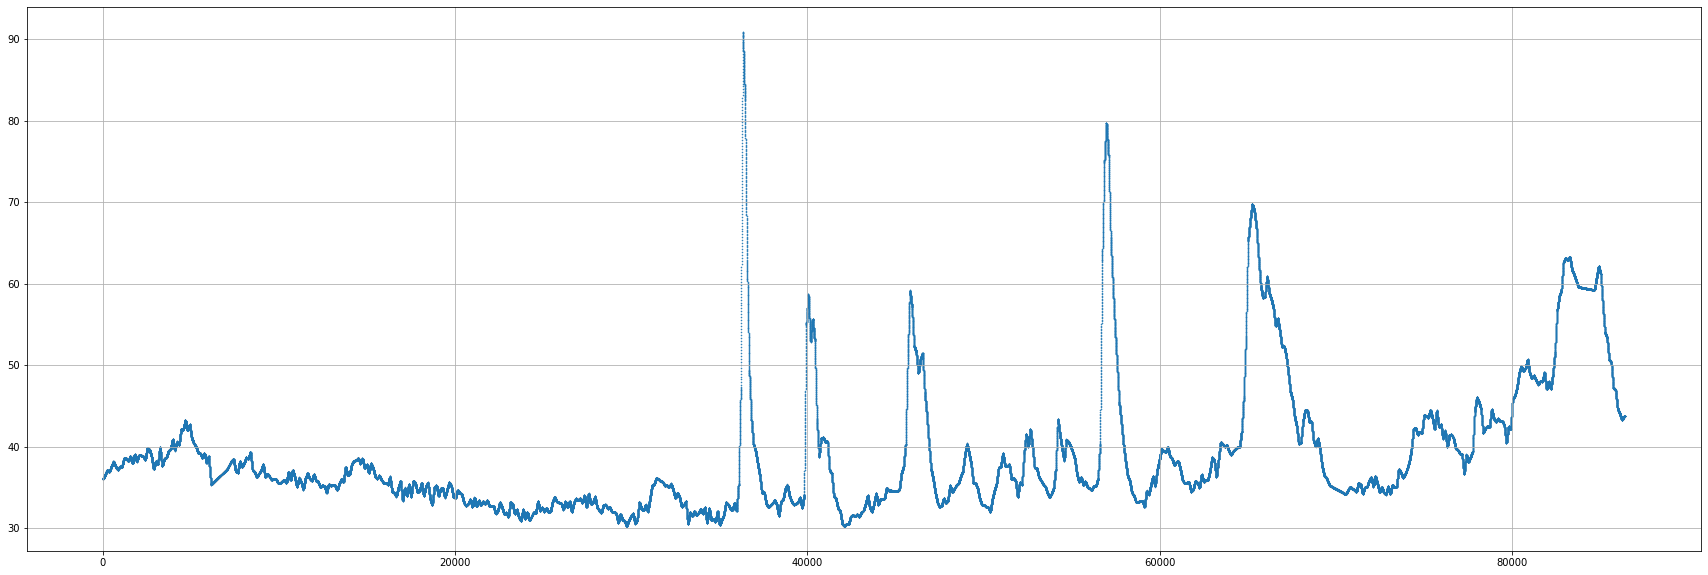

In [84]:
plt.figure(figsize=(30,10))
plt.scatter(final_time,final_rate,s=0.3)
plt.grid()
plt.show()